In [50]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import h5py
import Pk_library as PKL
mpl.style.use('style.mcstyle')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
sdir = '/home/mattho/git/ltu-cmass/data/testlc/borgpm/L1000-N128/100'
os.listdir(sdir)

['rho_transfer.npy',
 'rho.npy',
 'fvel.npy',
 'snapshots.npz',
 'config.yaml',
 'snapshots.h5']

In [52]:
with h5py.File(join(sdir, 'snapshots.h5'), 'r') as f:
    keys = list(f.keys())
rhos = []
with h5py.File(join(sdir, 'snapshots.h5'), 'r') as f:
    asave = f.attrs['asave']
    for key in keys:
        rho = np.array(f[key]['rho'])
        rhos.append(rho)
rhos = np.stack(rhos, axis=0)

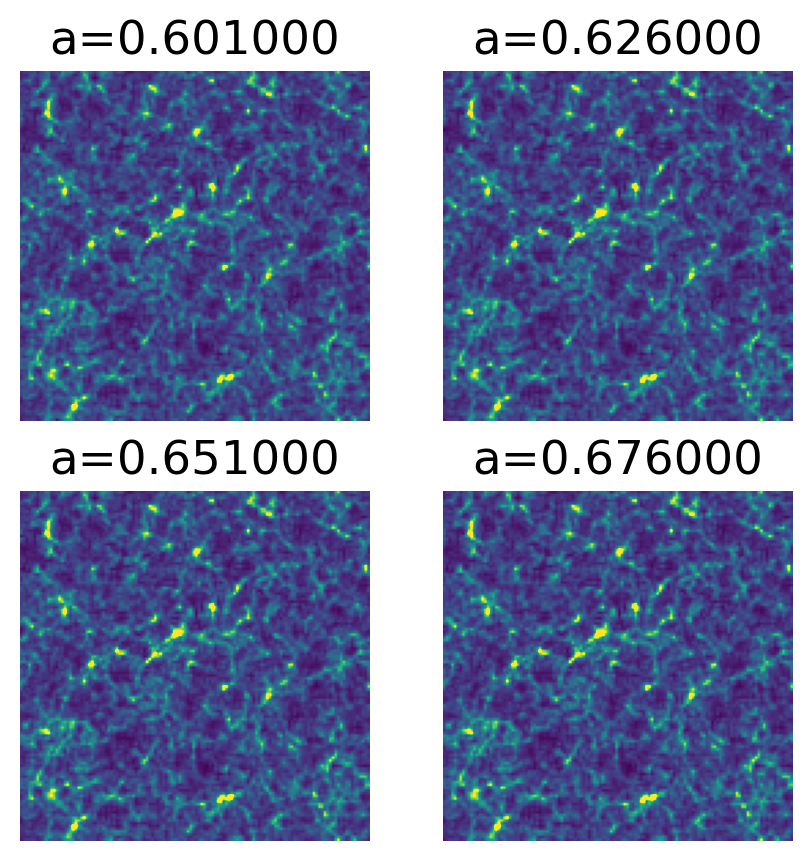

In [54]:
f, axs = plt.subplots(2, len(keys)//2, figsize=(5,5))
axs = axs.flatten()

for i, ax in enumerate(axs):
    rho = rhos[i]
    ax.imshow(rho[50], vmin=-1, vmax=3)
    ax.set_title(f'a={keys[i]}')
    ax.axis('off')

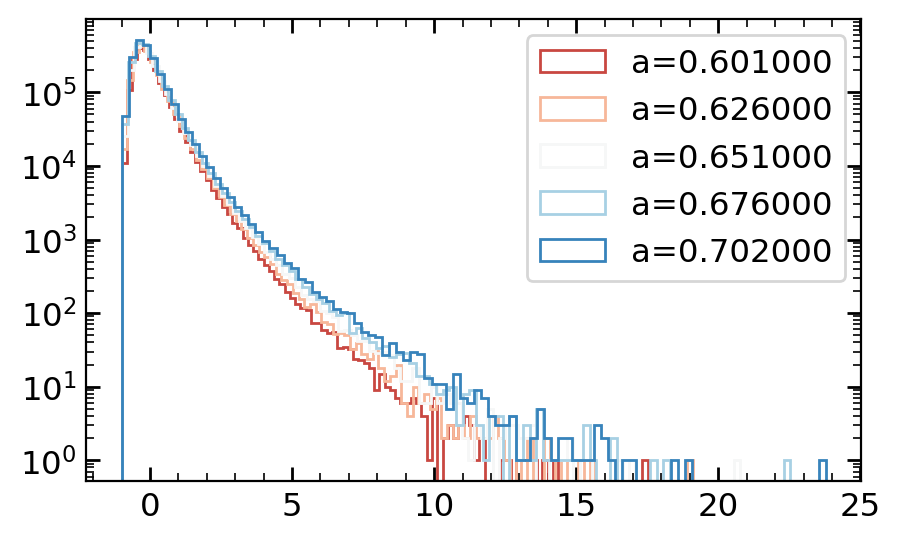

In [56]:
f, ax = plt.subplots(1, 1, figsize=(5,3))
ax.semilogy()
cmap = sns.color_palette('RdBu', n_colors=len(keys))
for i, key in enumerate(keys):
    rho = rhos[i]
    ax.hist(rho.flatten(), bins=100, histtype='step', label=f'a={key}', color=cmap[i])
ax.legend()

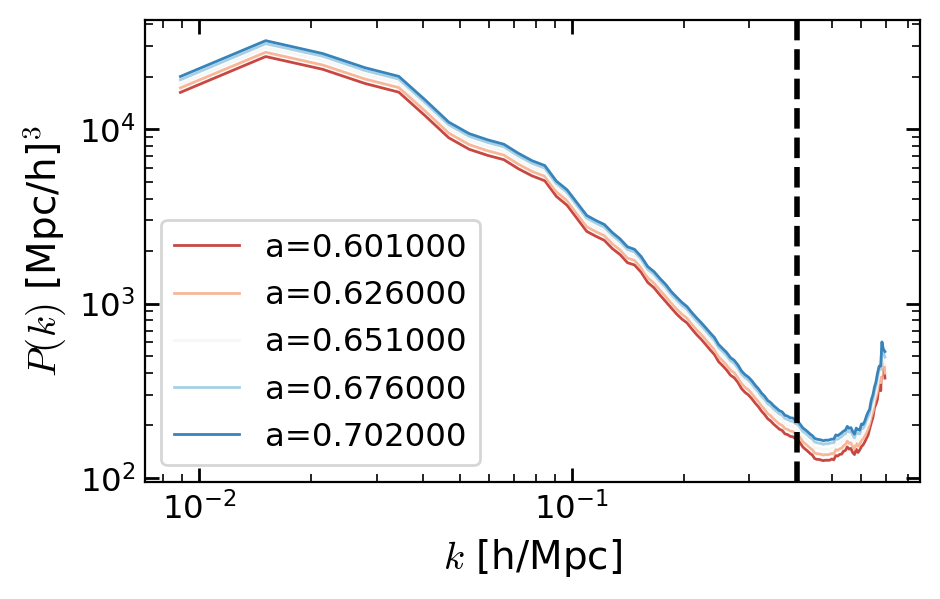

In [59]:
f, ax = plt.subplots(1, 1, figsize=(5,3))
ax.loglog()
cmap = sns.color_palette('RdBu', n_colors=len(keys))
for i, key in enumerate(keys):
    rho = rhos[i]
    Pk = PKL.Pk(rho, BoxSize=1000, axis=0, MAS='CIC', verbose=False)
    ax.plot(Pk.k3D, Pk.Pk[:,0], label=f'a={key}', color=cmap[i], lw=1)
ax.legend()
ax.set(xlabel=r'$k$ [h/Mpc]', ylabel=r'$P(k)$ [Mpc/h]$^3$')

nyq = np.pi*128/1000
ax.axvline(nyq, color='k', ls='--');
